In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gzip
import os
import gc
import multiprocessing
import warnings
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 65)

## Get the correlated clusters that are already saved.

In [2]:

all_days_real = pd.read_csv(f'/home/flutura/Files/all_days_dfs/1_minute_real_all_days.csv')
all_days_rand = pd.read_csv(f"/home/flutura/Files/all_days_dfs/1_minute_rand_all_days.csv")

In [3]:
all_days_real_6 = all_days_real[all_days_real['nr_bees_real']<=80]
all_days_rand_6 = all_days_rand[all_days_rand['nr_bees_rand']<=80] 

all_days_real_6 = all_days_real_6[all_days_real_6['day']>59]

all_days_rand_6 = all_days_rand_6[all_days_rand_6['day']<59]

## Plot histograms of variables

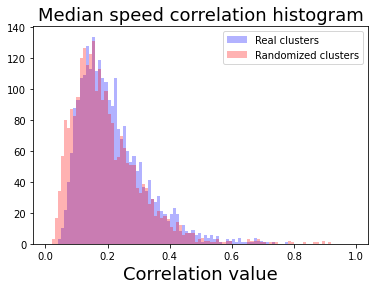

In [7]:
plt.hist(all_days_real_6['Median speed_avgcorr'], alpha = 0.3, color = 'blue', label = "Real clusters",bins = np.arange(0.01,1,0.01)) 
plt.hist(all_days_rand_6['Median speed_avgcorr_rand'], alpha = 0.3, color = 'red', label = "Randomized clusters",bins = np.arange(0.01,1,0.01))
plt.legend()
plt.title("Median speed correlation histogram",size = 18)
plt.xlabel( "Correlation value",size = 18)
plt.show()

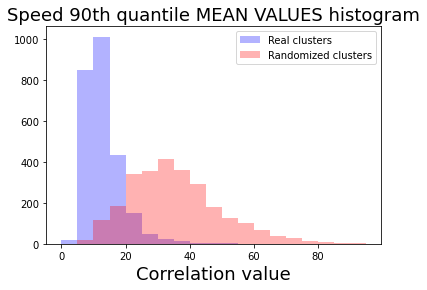

In [8]:
plt.hist(all_days_real_6['Speed 90th quantile_means'], alpha = 0.3, color = 'blue', label = "Real clusters",bins = np.arange(0.01,100,5)) 
plt.hist(all_days_rand_6['Speed 90th quantile_means_rand'], alpha = 0.3, color = 'red', label = "Randomized clusters",bins = np.arange(0.01,100,5))
plt.legend()
plt.title("Speed 90th quantile mean values histogram",size = 18)
plt.xlabel("Correlation value",size = 18)
plt.show()

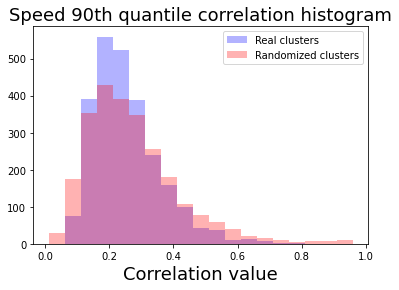

In [9]:
plt.hist(all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.3, color = 'blue', label = "Real clusters",bins = np.arange(0.01,1,0.05)) 
plt.hist(all_days_rand_6['Speed 90th quantile_avgcorr_rand'], alpha = 0.3, color = 'red', label = "Randomized clusters",bins = np.arange(0.01,1,0.05))
plt.legend()
plt.title("Speed 90th quantile correlation histogram",size = 18)
plt.xlabel("Correlation value",size = 18)
plt.show()

## Look at the relationship between variables of interest

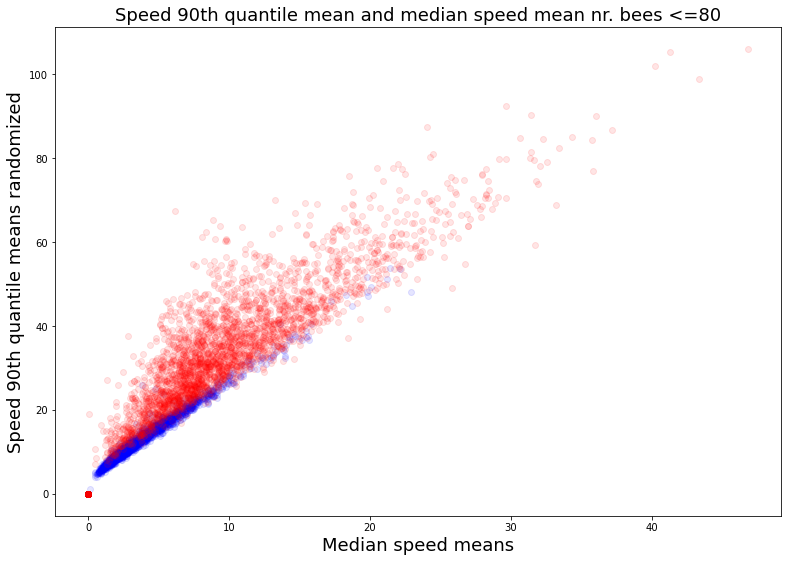

In [27]:
plt.rcParams["figure.figsize"] = (13,9)
plt.scatter( all_days_real_6['Median speed_means'],all_days_real_6['Speed 90th quantile_means'], alpha = 0.1, color = 'blue', label = "Real data")
plt.scatter(all_days_rand_6['Median speed_means_rand'],all_days_rand_6['Speed 90th quantile_means_rand'],   alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile means randomized',size = 18)
plt.xlabel("Median speed means",size = 18)
plt.title("Speed 90th quantile mean and median speed mean nr. bees <=80", size = 18)
plt.show()

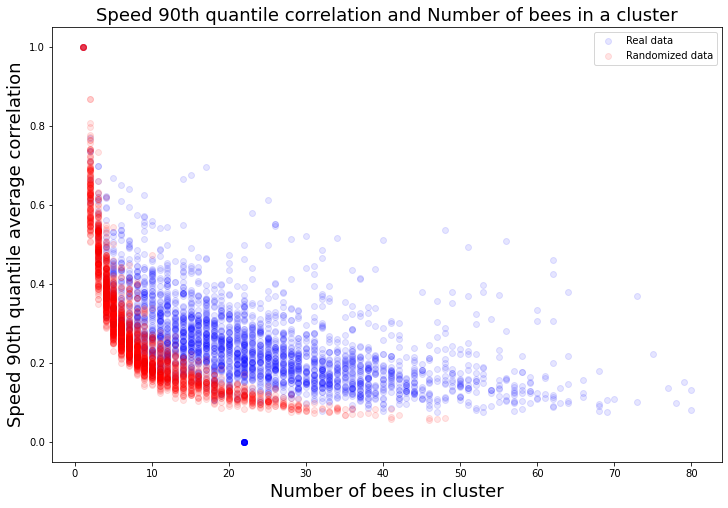

In [20]:
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter( all_days_real_6['nr_bees_real'],all_days_real_6['avg_corr_real'], alpha = 0.1, color = 'blue', label = "Real data")
plt.scatter(all_days_rand_6['nr_bees_rand'],all_days_rand_6['avg_corr_rand'],   alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile average correlation',size = 18)
plt.xlabel("Number of bees in cluster",size = 18)
plt.legend()
plt.title("Speed 90th quantile correlation and Number of bees in a cluster", size = 18)
plt.show()

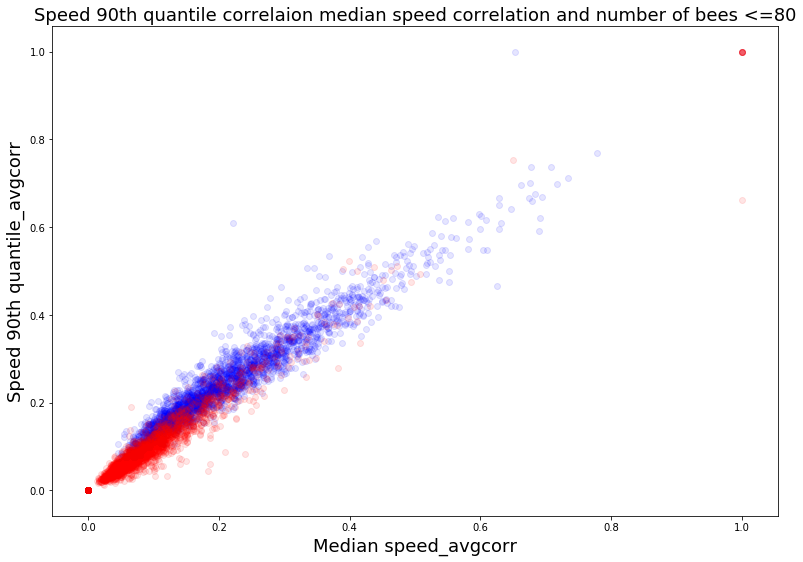

In [12]:
plt.rcParams["figure.figsize"] = (13,9)
plt.scatter( all_days_real_6['Median speed_avgcorr'],all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.1, color = 'blue', label = "Real data")
plt.scatter(all_days_rand_6['Median speed_avgcorr_rand'],all_days_rand_6['Speed 90th quantile_avgcorr_rand'],   alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile_avgcorr',size = 18)
plt.xlabel('Median speed_avgcorr',size = 18)
plt.title("Speed 90th quantile correlaion median speed correlation and number of bees <=80", size = 18)
plt.show()

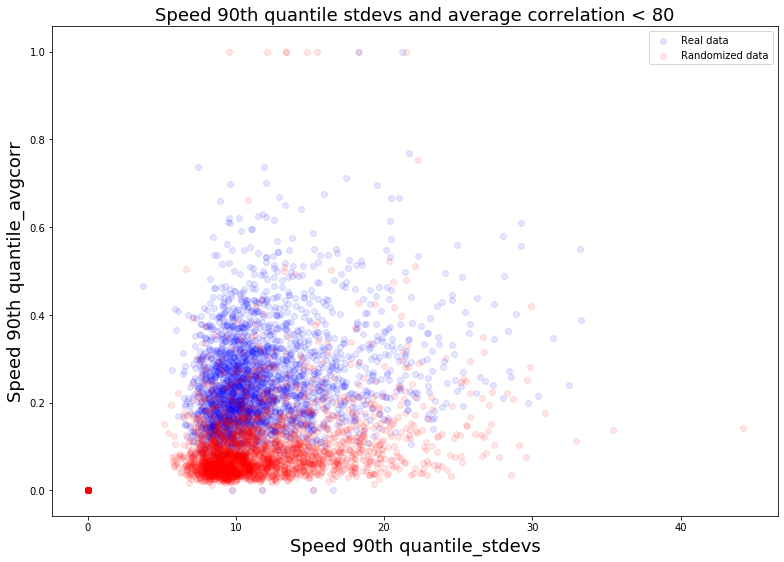

In [13]:
plt.rcParams["figure.figsize"] = (13,9)
plt.scatter( all_days_real_6['Speed 90th quantile_stdevs'],all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.1, color = 'blue', label = "Real data")
plt.scatter(all_days_rand_6['Speed 90th quantile_stdevs_rand'],all_days_rand_6['Speed 90th quantile_avgcorr_rand'],   alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile_avgcorr',size = 18)
plt.xlabel('Speed 90th quantile_stdevs',size = 18)
plt.title("Speed 90th quantile stdevs and average correlation < 80",size = 18)
plt.legend()
plt.show()

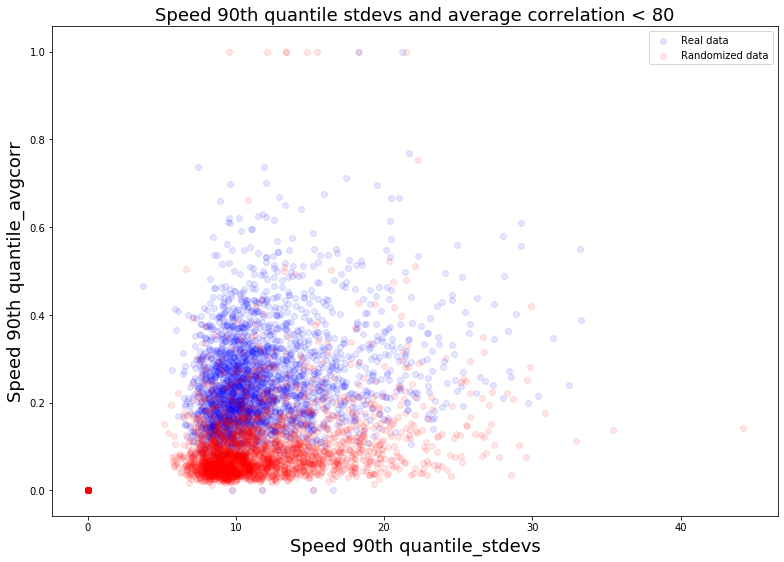

In [14]:
plt.rcParams["figure.figsize"] = (13,9)
plt.scatter( all_days_real_6['Speed 90th quantile_stdevs'],all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.1, color = 'blue', label = "Real data")
plt.scatter(all_days_rand_6['Speed 90th quantile_stdevs_rand'],all_days_rand_6['Speed 90th quantile_avgcorr_rand'],   alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile_avgcorr',size = 18)
plt.xlabel('Speed 90th quantile_stdevs',size = 18)
plt.title("Speed 90th quantile stdevs and average correlation < 80",size = 18)
plt.legend()
plt.show()

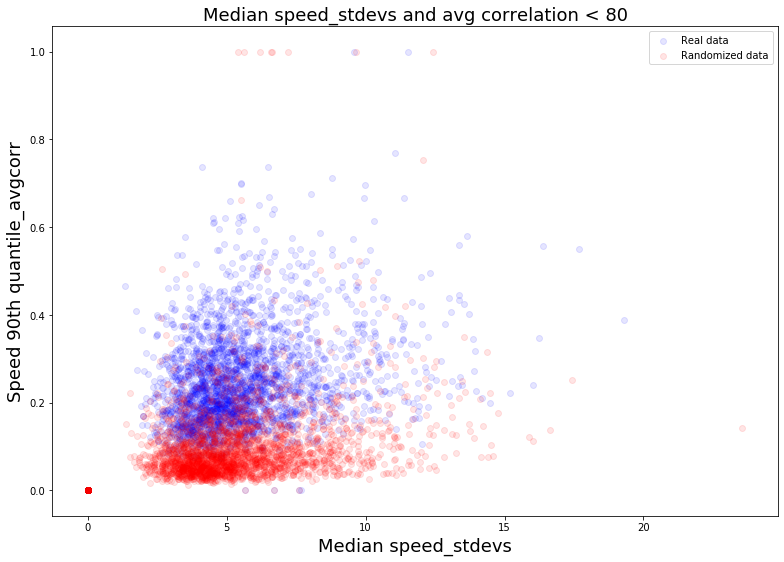

In [16]:
plt.rcParams["figure.figsize"] = (13,9)
plt.scatter(all_days_real_6['Median speed_stdevs'], all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.1, color = 'blue', label = "Real data")

plt.scatter(all_days_rand_6['Median speed_stdevs_rand'], all_days_rand_6['Speed 90th quantile_avgcorr_rand'],  alpha = 0.1, color = 'red', label = "Randomized data")
plt.ylabel('Speed 90th quantile_avgcorr',size = 18)
plt.xlabel('Median speed_stdevs',size = 18)
plt.title("Median speed_stdevs and avg correlation < 80",size = 18)

plt.legend()
plt.show()

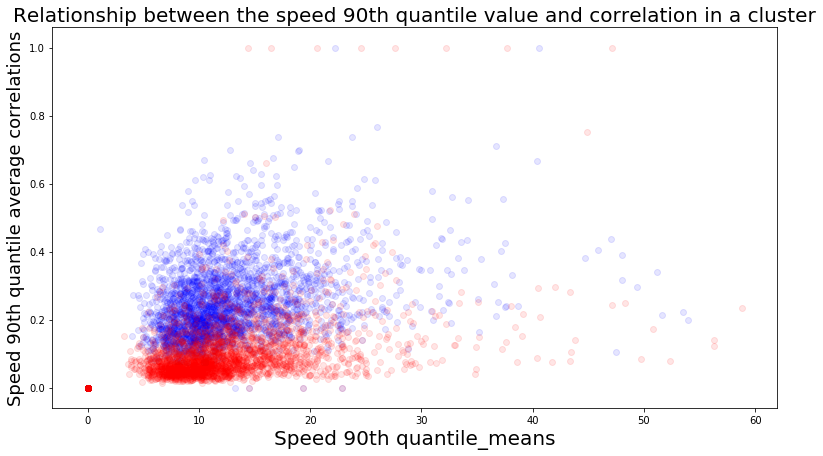

In [18]:
plt.rcParams["figure.figsize"] = (13,7)
plt.scatter( all_days_real_6['Speed 90th quantile_means'],all_days_real_6['Speed 90th quantile_avgcorr'], alpha = 0.1, color = 'blue')
plt.scatter(all_days_rand_6['Speed 90th quantile_means_rand'],all_days_rand_6['Speed 90th quantile_avgcorr_rand'],   alpha = 0.1, color = 'red')

plt.xlabel("Speed 90th quantile_means",size = 20)
plt.ylabel("Speed 90th quantile average correlations",size = 18)
plt.title("Relationship between the speed 90th quantile value and correlation in a cluster",size = 20)
plt.show()

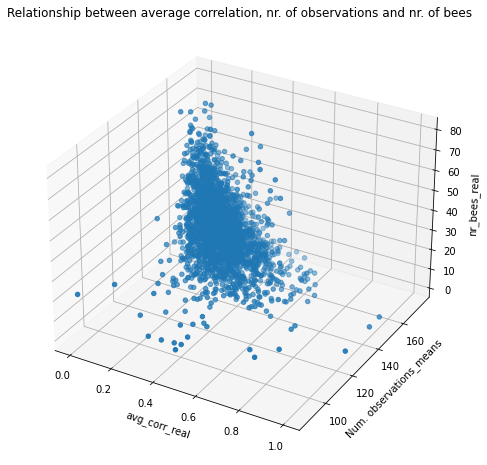

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Sample data
x = all_days_real_6['avg_corr_real']
y =all_days_real_6['Num. observations_means']
z =all_days_real_6['nr_bees_real']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('avg_corr_real')
ax.set_ylabel('Num. observations_means')
ax.set_zlabel('nr_bees_real')
ax.set_title("Relationship between average correlation, nr. of observations and nr. of bees")

# Show the plot
plt.show()